Missing values:
 Product_ID         0
Product_Name       0
Region             0
Marketing_Spend    0
Sales              0
Effectiveness      0
Side_Effects       0
Age_Group          0
Trial_Period       0
dtype: int64

Duplicate rows: 0

Data Overview:
        Product_ID  Marketing_Spend          Sales  Effectiveness  Side_Effects
count    10.00000        10.000000      10.000000      10.000000     10.000000
mean    105.50000     43500.000000   86500.000000      81.400000      3.500000
std       3.02765      9857.315388   21350.253707       6.131884      1.581139
min     101.00000     28000.000000   55000.000000      70.000000      1.000000
25%     103.25000     34500.000000   68750.000000      78.500000      2.250000
50%     105.50000     47500.000000   87500.000000      81.000000      3.500000
75%     107.75000     50750.000000  103750.000000      85.750000      4.750000
max     110.00000     53000.000000  115000.000000      90.000000      6.000000

First few rows:
    Product_ID Pr

C:\Users\bachu\AppData\Local\Temp\ipykernel_16172\2199922860.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Effectiveness', data=df, ci=None)


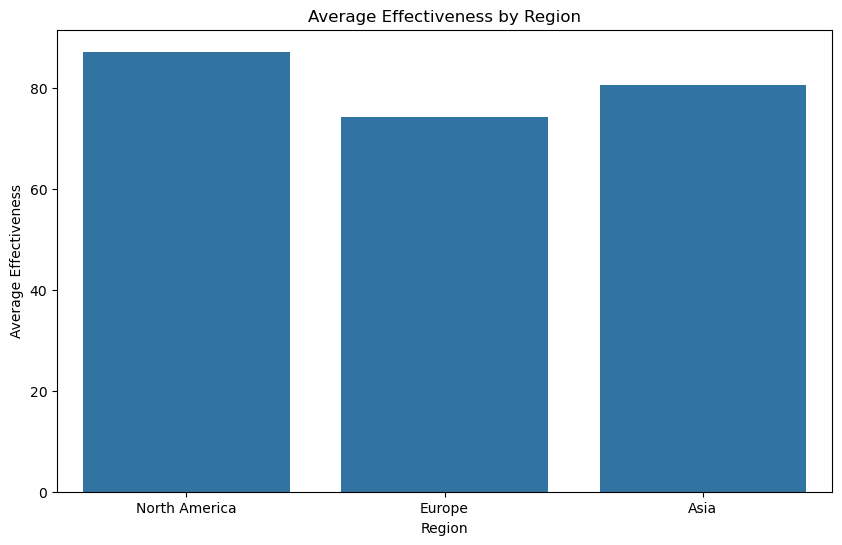

ValueError: Could not interpret value `Product` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
df = pd.read_csv("Pharma_data.csv")

# Step 2: Data Cleaning
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Handle missing values (example: drop rows with missing values)
df.dropna(inplace=True)

# Step 3: Data Exploration
print("\nData Overview:\n", df.describe())
print("\nFirst few rows:\n", df.head())

# Step 4: Create Visualizations

# 1. Bar Plot: Average Effectiveness by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Effectiveness', data=df, ci=None)
plt.title('Average Effectiveness by Region')
plt.xlabel('Region')
plt.ylabel('Average Effectiveness')
plt.show()

# 2. Violin Plot: Distribution of Effectiveness and Side_Effects for Each Product
plt.figure(figsize=(12, 6))
sns.violinplot(x='Product', y='Effectiveness', data=df, inner='quart')
sns.violinplot(x='Product', y='Side_Effects', data=df, inner='quart', color='red')
plt.title('Effectiveness and Side Effects by Product')
plt.xlabel('Product')
plt.ylabel('Value')
plt.show()

# 3. Pairplot: Explore Relationships between Effectiveness, Side_Effects, and Marketing_Spend
sns.pairplot(df[['Effectiveness', 'Side_Effects', 'Marketing_Spend']])
plt.show()

# 4. Boxplot: Comparing Effectiveness for Different Trial Periods
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trial_Period', y='Effectiveness', data=df)
plt.title('Effectiveness by Trial Period')
plt.xlabel('Trial Period')
plt.ylabel('Effectiveness')
plt.show()

# 5. Regression Plot: Analyze how Marketing_Spend affects drug Effectiveness
sns.regplot(x='Marketing_Spend', y='Effectiveness', data=df)
plt.title('Marketing Spend vs Effectiveness')
plt.xlabel('Marketing Spend')
plt.ylabel('Effectiveness')
plt.show()

# Step 5: Provide Analysis
# 1. Best Overall Effectiveness (Assuming highest average effectiveness in the bar plot)
best_product = df.groupby('Product')['Effectiveness'].mean().idxmax()
print(f"\nBest Overall Effectiveness: Product {best_product}")

# 2. Correlation Between Effectiveness and Side Effects
correlation = df[['Effectiveness', 'Side_Effects']].corr()
print(f"\nCorrelation between Effectiveness and Side Effects:\n{correlation}")
